<a href="https://colab.research.google.com/github/paishowstopper/TSAI/blob/main/EVA5/Session_9_Quiz/Session_9_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torch.optim.lr_scheduler import StepLR

Uploaded files to colab before execution (Uploaded in "framework" folder in github)

In [2]:
from model import BasicBlock
from datatransform import DataTransformation
from dataloader import Loader
from train import Train
from test import Test
import helper
from QuizDNN import QuizDNN

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [4]:
transform = DataTransformation()
#Different transforms for training and testing in this assignment
trainTransform = transform.AlbumentationTrainTransform()
testTransform = transform.AlbumentationTestTransform()

loader = Loader(trainTransform, testTransform, 128, 4)
#Going with the default variable values set in the data loader
trainloader, testloader, classes = loader.CIFAR10Load()


Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  cat plane  frog  ship


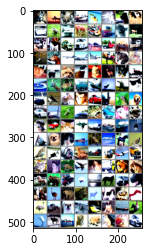

In [5]:
# Show random training images (default 4)
helper.DisplayImages(trainloader, classes)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 bird plane horse  bird


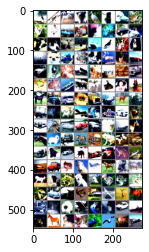

In [6]:
# Show random testing images (default 4)
helper.DisplayImages(testloader, classes)

In [7]:
model = QuizDNN().to(device)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=7, gamma=0.1)

In [9]:
#Display model summary
helper.DisplayModelSummary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]              96
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]             864
       BatchNorm2d-5           [-1, 32, 32, 32]              64
              ReLU-6           [-1, 32, 32, 32]               0
            Conv2d-7           [-1, 32, 32, 32]           9,216
       BatchNorm2d-8           [-1, 32, 32, 32]              64
              ReLU-9           [-1, 32, 32, 32]               0
        MaxPool2d-10           [-1, 32, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]           2,048
      BatchNorm2d-12           [-1, 64, 16, 16]             128
             ReLU-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1, 64,

In [10]:
epochs = 40

In [11]:
#Training
Train(trainloader, model, criterion, optimizer, scheduler, device, epochs).train()

  0%|          | 0/391 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/391 [00:00<?, ?it/s]

[1,   391] loss: 553.207


  0%|          | 0/391 [00:00<?, ?it/s]

[2,   391] loss: 387.276


  0%|          | 0/391 [00:00<?, ?it/s]

[3,   391] loss: 321.913


  0%|          | 0/391 [00:00<?, ?it/s]

[4,   391] loss: 280.830


  0%|          | 0/391 [00:00<?, ?it/s]

[5,   391] loss: 253.105


  0%|          | 0/391 [00:00<?, ?it/s]

[6,   391] loss: 232.739


  0%|          | 0/391 [00:00<?, ?it/s]

[7,   391] loss: 216.533


  0%|          | 0/391 [00:00<?, ?it/s]

[8,   391] loss: 204.328


  0%|          | 0/391 [00:00<?, ?it/s]

[9,   391] loss: 191.891


  0%|          | 0/391 [00:00<?, ?it/s]

[10,   391] loss: 182.143


  0%|          | 0/391 [00:00<?, ?it/s]

[11,   391] loss: 173.973


  0%|          | 0/391 [00:00<?, ?it/s]

[12,   391] loss: 166.922


  0%|          | 0/391 [00:00<?, ?it/s]

[13,   391] loss: 158.835


  0%|          | 0/391 [00:00<?, ?it/s]

[14,   391] loss: 152.663


  0%|          | 0/391 [00:00<?, ?it/s]

[15,   391] loss: 145.669


  0%|          | 0/391 [00:00<?, ?it/s]

[16,   391] loss: 141.761


  0%|          | 0/391 [00:00<?, ?it/s]

[17,   391] loss: 137.642


  0%|          | 0/391 [00:00<?, ?it/s]

[18,   391] loss: 132.132


  0%|          | 0/391 [00:00<?, ?it/s]

[19,   391] loss: 127.893


  0%|          | 0/391 [00:00<?, ?it/s]

[20,   391] loss: 124.614


  0%|          | 0/391 [00:00<?, ?it/s]

[21,   391] loss: 117.939


  0%|          | 0/391 [00:00<?, ?it/s]

[22,   391] loss: 114.930


  0%|          | 0/391 [00:00<?, ?it/s]

[23,   391] loss: 111.425


  0%|          | 0/391 [00:00<?, ?it/s]

[24,   391] loss: 110.460


  0%|          | 0/391 [00:00<?, ?it/s]

[25,   391] loss: 105.574


  0%|          | 0/391 [00:00<?, ?it/s]

[26,   391] loss: 101.817


  0%|          | 0/391 [00:00<?, ?it/s]

[27,   391] loss: 100.474


  0%|          | 0/391 [00:00<?, ?it/s]

[28,   391] loss: 97.993


  0%|          | 0/391 [00:00<?, ?it/s]

[29,   391] loss: 93.941


  0%|          | 0/391 [00:00<?, ?it/s]

[30,   391] loss: 93.051


  0%|          | 0/391 [00:00<?, ?it/s]

[31,   391] loss: 90.498


  0%|          | 0/391 [00:00<?, ?it/s]

[32,   391] loss: 87.919


  0%|          | 0/391 [00:00<?, ?it/s]

[33,   391] loss: 83.833


  0%|          | 0/391 [00:00<?, ?it/s]

[34,   391] loss: 84.039


  0%|          | 0/391 [00:00<?, ?it/s]

[35,   391] loss: 80.679


  0%|          | 0/391 [00:00<?, ?it/s]

[36,   391] loss: 79.928


  0%|          | 0/391 [00:00<?, ?it/s]

[37,   391] loss: 78.907


  0%|          | 0/391 [00:00<?, ?it/s]

[38,   391] loss: 76.571


  0%|          | 0/391 [00:00<?, ?it/s]

[39,   391] loss: 73.816


100%|██████████| 391/391 [00:11<00:00, 34.95it/s]

[40,   391] loss: 72.187


In [12]:
#Testing
Test(testloader, model, criterion, device).test()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy of the network on the 10000 test images: 86 %
